Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.89     12097
           1       0.77      0.97      0.86      7903

    accuracy                           0.87     20000
   macro avg       0.87      0.89      0.87     20000
weighted avg       0.89      0.87      0.88     20000

Confusion Matrix:
 [[9828 2269]
 [ 254 7649]]

Gradient Boosting Feature Importances (all features, sorted):
                    Feature  Importance
2   Transaction Success_Yes    0.878577
0                       Age    0.058712
1        Transaction Amount    0.056975
5       Product Name_Laptop    0.001642
10  Product Name_Smartwatch    0.001313
9   Product Name_Smartphone    0.001164
7      Product Name_Printer    0.001020
11      Product Name_Tablet    0.000573
12                 Gender_M    0.000015
8       Product Name_Router    0.000005
3   Product Name_Headphones    0.000004
4     Product Name_Keyboard    0.000000
6        Product Nam

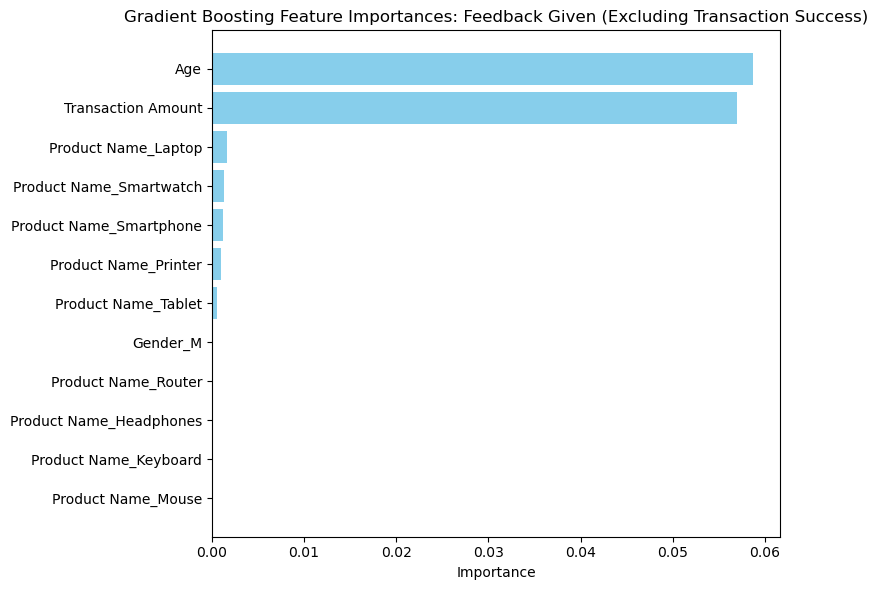

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix


# 1. Load Dataset

df = pd.read_csv('eledget_single_dataset_stronger_patterns.csv')


# 2. Select Relevant Columns for Feedback

df = df[['Age', 'Transaction Success', 'Transaction Amount', 'Product Name', 'Gender', 'Feedback Given']]


# 3. Prepare Target & Features

df['Feedback Given'] = df['Feedback Given'].map({'Yes': 1, 'No': 0})

y = df['Feedback Given']
X = df.drop('Feedback Given', axis=1)


# 4. Identify Numeric & Categorical Columns

numeric_features = ['Age', 'Transaction Amount']
categorical_features = ['Transaction Success', 'Product Name', 'Gender']


# 5. Create Preprocessing + Modeling Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('gb', gb_model)
])


# 6. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 7. Fit and evaluate the Model

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# 8. Extract & Display Feature Importances

ohe_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

importances = pipeline.named_steps['gb'].feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# -- Remove Transaction Success from the final chart --
feature_importance_df_no_TS = feature_importance_df[
    ~feature_importance_df['Feature'].str.contains('Transaction Success')
]

print("\nGradient Boosting Feature Importances (all features, sorted):")
print(feature_importance_df)

print("\nGradient Boosting Feature Importances (excluding Transaction Success):")
print(feature_importance_df_no_TS)


# 9. Plot the Feature Importances (excluding Transaction Success)

plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df_no_TS['Feature'], feature_importance_df_no_TS['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.title("Gradient Boosting Feature Importances: Feedback Given (Excluding Transaction Success)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
